In [1]:
# Step 1: Import pandas
import pandas as pd

# Step 2: Load CSV from URL
url = 'https://raw.githubusercontent.com/egorpol/beat_it/refs/heads/main/csv/dufour_onsets_aubio.csv'
df = pd.read_csv(url)

# Step 3: Display the first few rows of the DataFrame
display(df)


,onset_times
0,0.047778
1,0.111610
2,0.147574
3,0.202630
4,0.259138
...,...
315,69.283469
316,69.626667
317,69.647619
318,69.748662


In [2]:
import numpy as np

onset_times = df['onset_times'].tolist()

# Desired interval and tolerance
interval = 2.23    # Desired interval in seconds
tolerance = 0.1   # Tolerance in seconds

# Build a directed acyclic graph (DAG) where nodes are onset times
edges = {t: [] for t in onset_times}

# Construct edges between onset times that are approximately 'interval' apart
for i in range(len(onset_times)):
    for j in range(i + 1, len(onset_times)):
        delta_t = onset_times[j] - onset_times[i]
        if abs(delta_t - interval) <= tolerance:
            edges[onset_times[i]].append(onset_times[j])

# Function to find the longest path starting from a given node
def find_longest_path(node, edges, memo):
    if node in memo:
        return memo[node]
    max_length = 1
    max_path = [node]
    for neighbor in edges[node]:
        path = find_longest_path(neighbor, edges, memo)
        if 1 + len(path) > max_length:
            max_length = 1 + len(path)
            max_path = [node] + path
    memo[node] = max_path
    return max_path

# Find all longest sequences in the DAG
memo = {}
longest_length = 0
longest_paths = []

for node in onset_times:
    path = find_longest_path(node, edges, memo)
    if len(path) > longest_length:
        longest_length = len(path)
        longest_paths = [path]
    elif len(path) == longest_length:
        longest_paths.append(path)

# Output all sequences that have the longest length
for idx, path in enumerate(longest_paths):
    print(f"Sequence {idx + 1}:")
    print(np.array(path))

Sequence 1:
[ 0.33553288  2.64290249  4.80333333  7.02716553  9.35476191 11.55709751
 13.71519274 16.02566893 18.25160998 20.42712018 22.72131519 24.89569161
 27.11873016 29.42866213 31.58469388 33.89403628 36.1407483  38.38446712
 40.60596372 42.84984127 45.07115646 47.31435374 49.53784581 51.7822449
 53.94340136 56.23986395 58.47145125 60.699161   62.93659864 65.15827664
 67.40297052 69.62666667]
Sequence 2:
[ 0.41494331  2.64290249  4.80333333  7.02716553  9.35476191 11.55709751
 13.71519274 16.02566893 18.25160998 20.42712018 22.72131519 24.89569161
 27.11873016 29.42866213 31.58469388 33.89403628 36.1407483  38.38446712
 40.60596372 42.84984127 45.07115646 47.31435374 49.53784581 51.7822449
 53.94340136 56.23986395 58.47145125 60.699161   62.93659864 65.15827664
 67.40297052 69.62666667]
Sequence 3:
[ 0.51920635  2.74272109  4.88587302  7.02716553  9.35476191 11.55709751
 13.71519274 16.02566893 18.25160998 20.42712018 22.72131519 24.89569161
 27.11873016 29.42866213 31.58469388 3

In [3]:
# Automatically detect the number of sequences
num_sequences = len(longest_paths)

# Loop through all sequences and print them dynamically
for idx in range(num_sequences):
    sequence = longest_paths[idx]
    print(f"Sequence {idx + 1}:")
    print(np.array(sequence))

    # You can store each sequence in a variable dynamically if needed
    # e.g., if you want to store the first sequence:
    if idx == 0:
        seq1 = sequence
    elif idx == 1:
        seq2 = sequence
    elif idx == 2:
        seq3 = sequence


Sequence 1:
[ 0.33553288  2.64290249  4.80333333  7.02716553  9.35476191 11.55709751
 13.71519274 16.02566893 18.25160998 20.42712018 22.72131519 24.89569161
 27.11873016 29.42866213 31.58469388 33.89403628 36.1407483  38.38446712
 40.60596372 42.84984127 45.07115646 47.31435374 49.53784581 51.7822449
 53.94340136 56.23986395 58.47145125 60.699161   62.93659864 65.15827664
 67.40297052 69.62666667]
Sequence 2:
[ 0.41494331  2.64290249  4.80333333  7.02716553  9.35476191 11.55709751
 13.71519274 16.02566893 18.25160998 20.42712018 22.72131519 24.89569161
 27.11873016 29.42866213 31.58469388 33.89403628 36.1407483  38.38446712
 40.60596372 42.84984127 45.07115646 47.31435374 49.53784581 51.7822449
 53.94340136 56.23986395 58.47145125 60.699161   62.93659864 65.15827664
 67.40297052 69.62666667]
Sequence 3:
[ 0.51920635  2.74272109  4.88587302  7.02716553  9.35476191 11.55709751
 13.71519274 16.02566893 18.25160998 20.42712018 22.72131519 24.89569161
 27.11873016 29.42866213 31.58469388 3

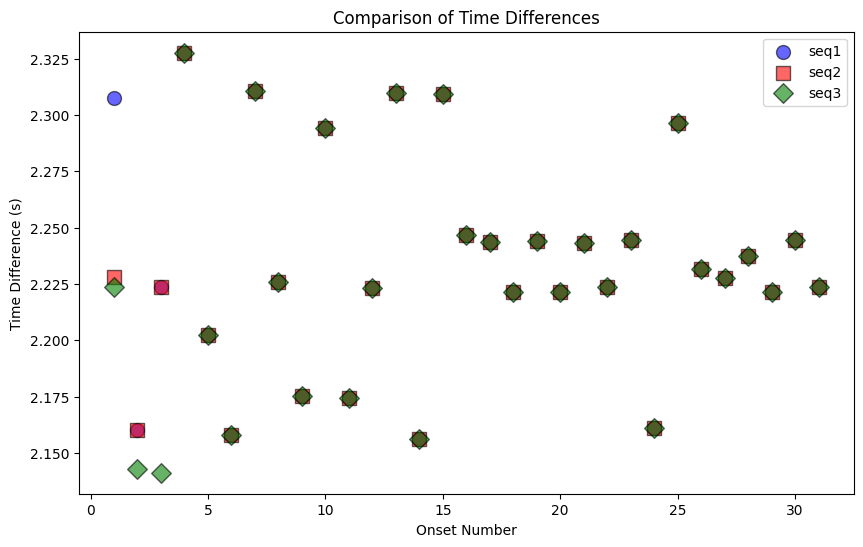

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Compute differences for each sequence
seq1_diff = np.diff(seq1)
seq2_diff = np.diff(seq2)
seq3_diff = np.diff(seq3)

# Create a DataFrame for plotting
numbers = np.arange(1, len(seq1_diff) + 1)
data_plot = pd.DataFrame({"onset_nr": numbers, "seq1_diff": seq1_diff, "seq2_diff": seq2_diff, "seq3_diff": seq3_diff})

# Plotting the data with transparency (no jitter)
plt.figure(figsize=(10, 6))

# Plot seq1 with transparency and distinguishable markers
plt.scatter(data_plot["onset_nr"],
            data_plot["seq1_diff"], label="seq1",
            marker="o", color="blue", s=100, edgecolor='black', alpha=0.6)

# Plot seq2 with transparency and distinguishable markers
plt.scatter(data_plot["onset_nr"],
            data_plot["seq2_diff"], label="seq2",
            marker="s", color="red", s=100, edgecolor='black', alpha=0.6)

# Plot seq3 with transparency and distinguishable markers
plt.scatter(data_plot["onset_nr"],
            data_plot["seq3_diff"], label="seq3",
            marker="D", color="green", s=100, edgecolor='black', alpha=0.6)

# Add labels, title, and legend
plt.legend(loc="upper right")
plt.xlabel("Onset Number")
plt.ylabel("Time Difference (s)")
plt.title("Comparison of Time Differences")

# Display the plot
plt.show()


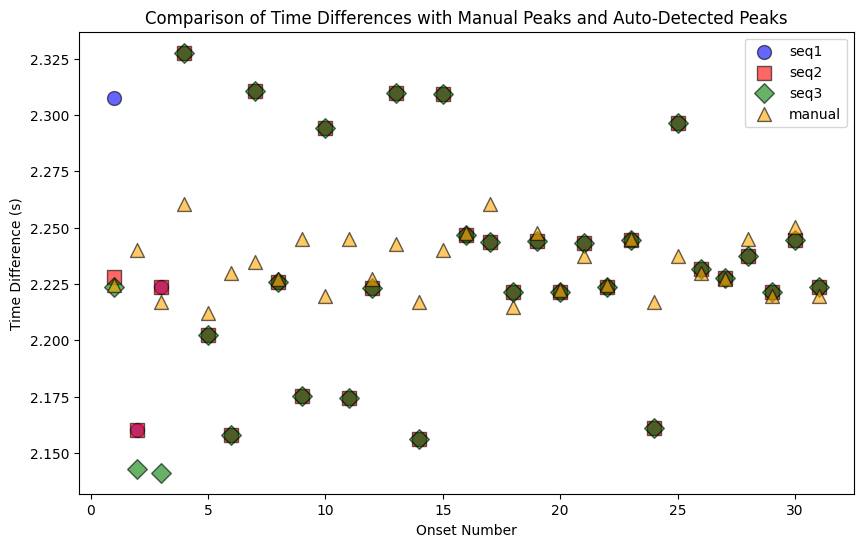

In [5]:
# Step 2: Load CSV from URL
url = 'https://raw.githubusercontent.com/egorpol/beat_it/refs/heads/main/csv/dufour_manual.csv'
df2 = pd.read_csv(url)

manual_peaks = df2['peaks_in_sec'].tolist()


# Compute differences for each sequence
seq1_diff = np.diff(seq1)
seq2_diff = np.diff(seq2)
seq3_diff = np.diff(seq3)
manual_diff = np.diff(manual_peaks)  # Add manual peaks differences

# Create a DataFrame for plotting
numbers = np.arange(1, len(seq1_diff) + 1)
data_plot = pd.DataFrame({
    "onset_nr": numbers,
    "seq1_diff": seq1_diff,
    "seq2_diff": seq2_diff,
    "seq3_diff": seq3_diff,
    "manual_diff": manual_diff  # Include manual peaks data
})

# Plotting the data with transparency (no jitter)
plt.figure(figsize=(10, 6))

# Plot seq1
plt.scatter(data_plot["onset_nr"],
            data_plot["seq1_diff"], label="seq1",
            marker="o", color="blue", s=100, edgecolor='black', alpha=0.6)

# Plot seq2
plt.scatter(data_plot["onset_nr"],
            data_plot["seq2_diff"], label="seq2",
            marker="s", color="red", s=100, edgecolor='black', alpha=0.6)

# Plot seq3
plt.scatter(data_plot["onset_nr"],
            data_plot["seq3_diff"], label="seq3",
            marker="D", color="green", s=100, edgecolor='black', alpha=0.6)

# Plot manual peaks with a new color, let's use orange
plt.scatter(data_plot["onset_nr"],
            data_plot["manual_diff"], label="manual",
            marker="^", color="orange", s=100, edgecolor='black', alpha=0.6)

# Add labels, title, and legend
plt.legend(loc="upper right")
plt.xlabel("Onset Number")
plt.ylabel("Time Difference (s)")
plt.title("Comparison of Time Differences with Manual Peaks and Auto-Detected Peaks")

# Display the plot
plt.show()
